In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import time

## Creating PyTorch Model

In [2]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 10)
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 6 * 6)
        x = F.log_softmax(self.fc1(x), dim=-1)
        return x

model = Net()

## Creating Toy Data

In [3]:
data = []
for i in range(1000):
    x1 = np.random.randint(low=1, high=200)
    x2 = np.random.randint(low=1, high=200)
    if x1 < x2:
        data.append([x1,x2,1])
    else:
        data.append([x1,x2,0])

In [4]:
data_f = pd.DataFrame(data, columns = ['x1', 'x2', 'y'])
data_f.head()

,x1,x2,y
0,142,11,0
1,181,143,0
2,125,64,0
3,93,195,1
4,149,168,1


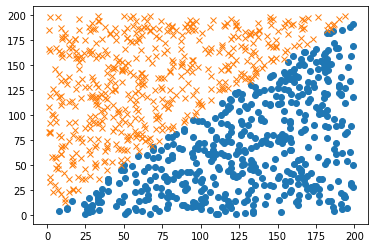

In [5]:
plt.plot(data_f[data_f.y==0].x1, data_f[data_f.y==0].x2, 'o')
plt.plot(data_f[data_f.y==1].x1, data_f[data_f.y==1].x2, 'x')

In [6]:
M = data_f.values
X = M[:,:-1]
y = M[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Creating the model

In [7]:
# Non_Linear Function Separator
class Seperator(nn.Module):
    
    def __init__(self):
        super(Seperator, self).__init__()
        self.dense1 = nn.Linear(2,2)
        self.dense2 = nn.Linear(2,8)
        self.dense3 = nn.Linear(8,16)
        self.dense4 = nn.Linear(16,8)
        self.dense5 = nn.Linear(8,2)
        self.dense6 = nn.Linear(2,1)
    
    def forward(self,x):
        x_1 = F.sigmoid(self.dense1(x))
        x_2 = F.sigmoid(self.dense2(x_1))
        x_3 = F.sigmoid(self.dense3(x_2))
        x_4 = F.sigmoid(self.dense4(x_3))
        x_5 = F.sigmoid(self.dense5(x_4))
        x_6 = F.sigmoid(self.dense6(x_5))
        return x_6
    
model_1 = Seperator()

In [8]:
print(model_1)

Seperator(
  (dense1): Linear(in_features=2, out_features=2, bias=True)
  (dense2): Linear(in_features=2, out_features=8, bias=True)
  (dense3): Linear(in_features=8, out_features=16, bias=True)
  (dense4): Linear(in_features=16, out_features=8, bias=True)
  (dense5): Linear(in_features=8, out_features=2, bias=True)
  (dense6): Linear(in_features=2, out_features=1, bias=True)
)


In [9]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.RMSprop(model_1.parameters(), lr=0.01)

In [10]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

In [16]:
X_train

tensor([[ 32, 114],
        [158,  34],
        [ 79,  87],
        ...,
        [141,  30],
        [ 17,  26],
        [163,  37]])

## Evaluating the model

In [11]:
%%time
for t in range(25):
    y_pred = model_1(X_train.float())
    loss = criterion(y_pred,y_train.float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

CPU times: user 90.8 ms, sys: 5.39 ms, total: 96.1 ms
Wall time: 51.9 ms


/opt/anaconda3/envs/Pytorch/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/opt/anaconda3/envs/Pytorch/lib/python3.7/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([670])) that is different to the input size (torch.Size([670, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


In [12]:
y_pred = model_1(X_test.float())
y_pred = y_pred.detach().numpy()
y_pred

array([[0.35429177],
       [0.7681008 ],
       [0.35429177],
       [0.35447723],
       [0.7681254 ],
       [0.7681254 ],
       [0.7681254 ],
       [0.76752645],
       [0.35429177],
       [0.7681153 ],
       [0.35429177],
       [0.76812094],
       [0.7681254 ],
       [0.7681254 ],
       [0.3578363 ],
       [0.3542918 ],
       [0.3542924 ],
       [0.35429177],
       [0.35445896],
       [0.7681254 ],
       [0.7681254 ],
       [0.7681254 ],
       [0.35429177],
       [0.7681254 ],
       [0.35429177],
       [0.35429177],
       [0.7681234 ],
       [0.7681254 ],
       [0.7681254 ],
       [0.7681254 ],
       [0.7681254 ],
       [0.35429177],
       [0.35429177],
       [0.7681254 ],
       [0.7681254 ],
       [0.3946726 ],
       [0.35429177],
       [0.35429177],
       [0.35429177],
       [0.35429364],
       [0.35429177],
       [0.76513785],
       [0.7671968 ],
       [0.35429183],
       [0.3752158 ],
       [0.7681254 ],
       [0.7662897 ],
       [0.354

In [13]:
y_pred = 1 * (y_pred  > 0.5)
print("Confusion Matrix: \n {}".format(confusion_matrix(y_test, y_pred)))
print('Accuracy on Test Data:{:.3}'.format(accuracy_score(y_test, y_pred)))

Confusion Matrix: 
 [[143  16]
 [  0 171]]
Accuracy on Test Data:0.952


In [14]:
96.1/25

3.844